In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian forest fire cleaned data.csv')

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df.drop(['Unnamed: 0', 'day', 'month', 'year'], axis=1, inplace = True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [6]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [9]:
# Encoding
df['Classes'] = np.where(df['Classes'] == 'fire', 1,0)

In [17]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [10]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
# Here we will predict FWI (y) and rest all features are (x)
# Splitting variables into X & y
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### MultiCollinearity : If any two feature in X are highly correlated (>80%), we can drop any one feature and keep the other.
#### Highly correlated means the two features acts like same, so this will not affect the o/p much

In [20]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [27]:
corr_features

{'BUI', 'DC'}

In [28]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

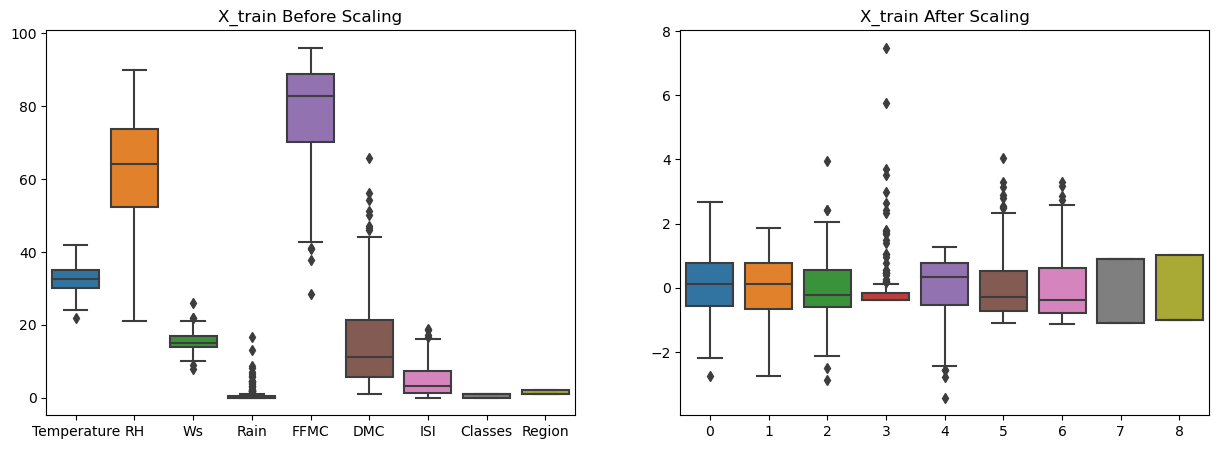

In [31]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
y_pred=linreg.predict(X_test_scaled)

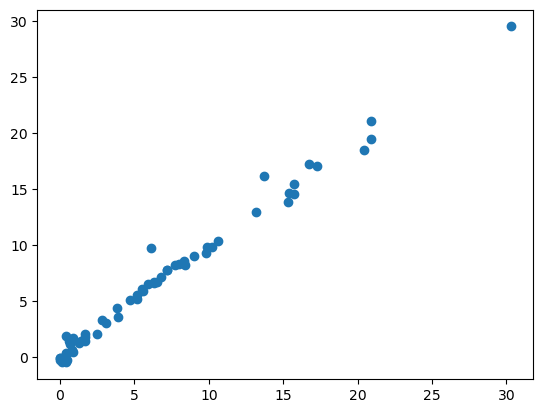

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5468236465249985
R2 Score 0.9847657384266951


# Lasso regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [39]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

Lasso()

In [40]:
y_pred=lasso.predict(X_test_scaled)

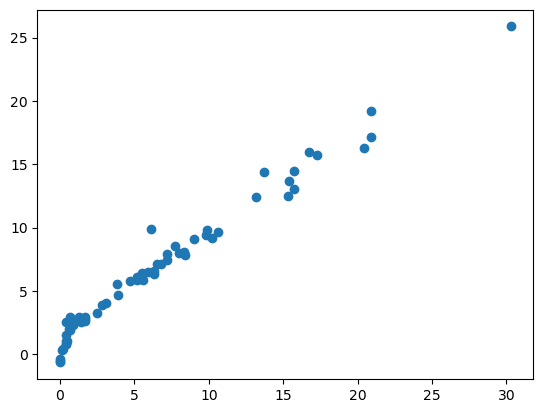

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1331759949144085
R2 Score 0.9492020263112388


### Cross Validation Lasso

In [43]:
from sklearn.linear_model import LassoCV

In [44]:
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [45]:
y_pred=lassocv.predict(X_test_scaled)

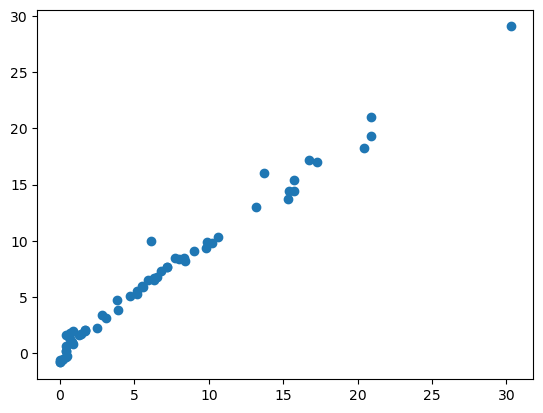

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [48]:
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6199701158263433
R2 Score 0.9820946715928275


## Ridge Regression model

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [50]:
ridge=Ridge()

In [51]:
ridge.fit(X_train_scaled,y_train)

Ridge()

In [52]:
y_pred=ridge.predict(X_test_scaled)

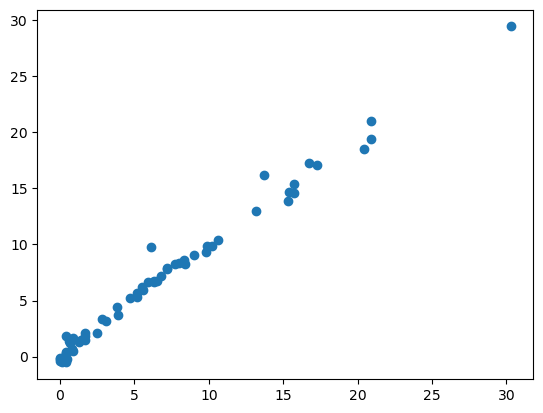

In [54]:
plt.scatter(y_test,y_pred)

In [55]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [56]:
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105713
R2 Score 0.9842993364555512


### Cross Validation Ridge

In [57]:
from sklearn.linear_model import RidgeCV

In [58]:
ridgecv=RidgeCV(cv=5)

In [59]:
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)

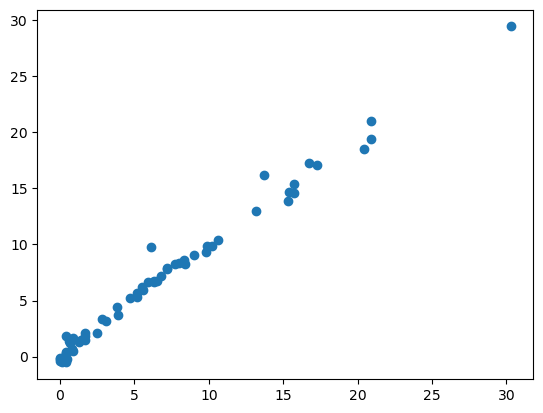

In [60]:
plt.scatter(y_test,y_pred)

In [61]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [62]:
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105713
R2 Score 0.9842993364555512


## Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


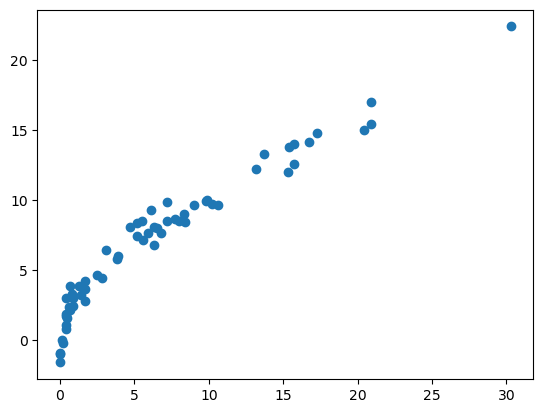

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6575946731430906
R2 Score 0.9814217587854941


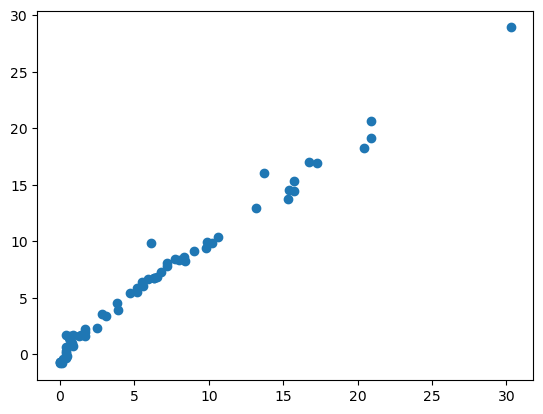

In [64]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

# Pickling the ML models

In [65]:
import pickle

In [66]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [67]:
pickle.dump(scaler, open('ridge.pkl', 'wb'))